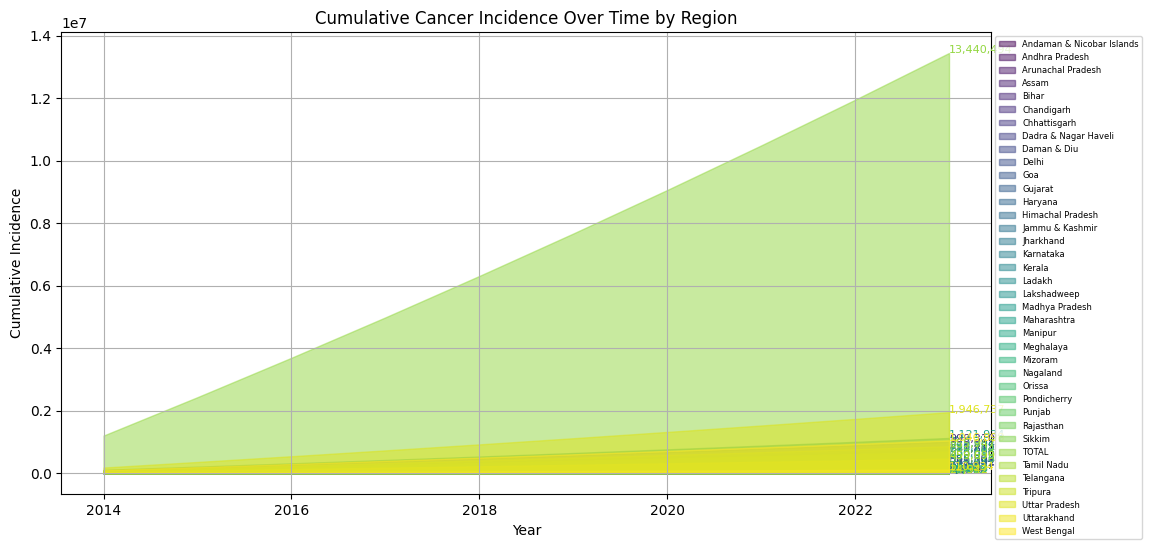

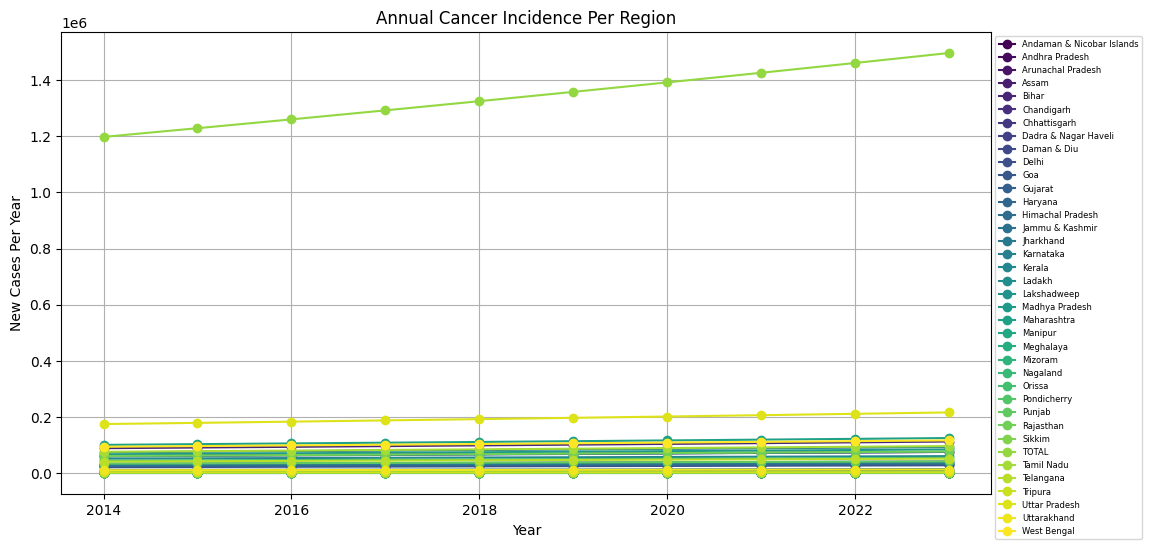

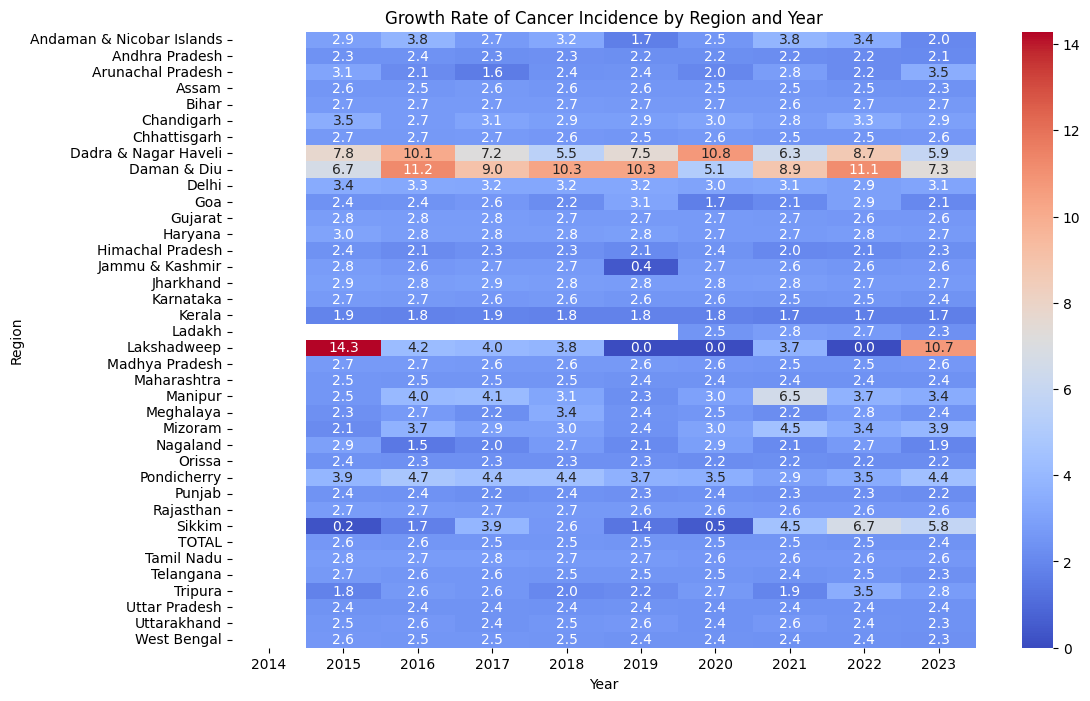

C:\Users\suman\AppData\Local\Temp\ipykernel_15652\1208569480.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="region", y="Incidence", data=df, palette="viridis")


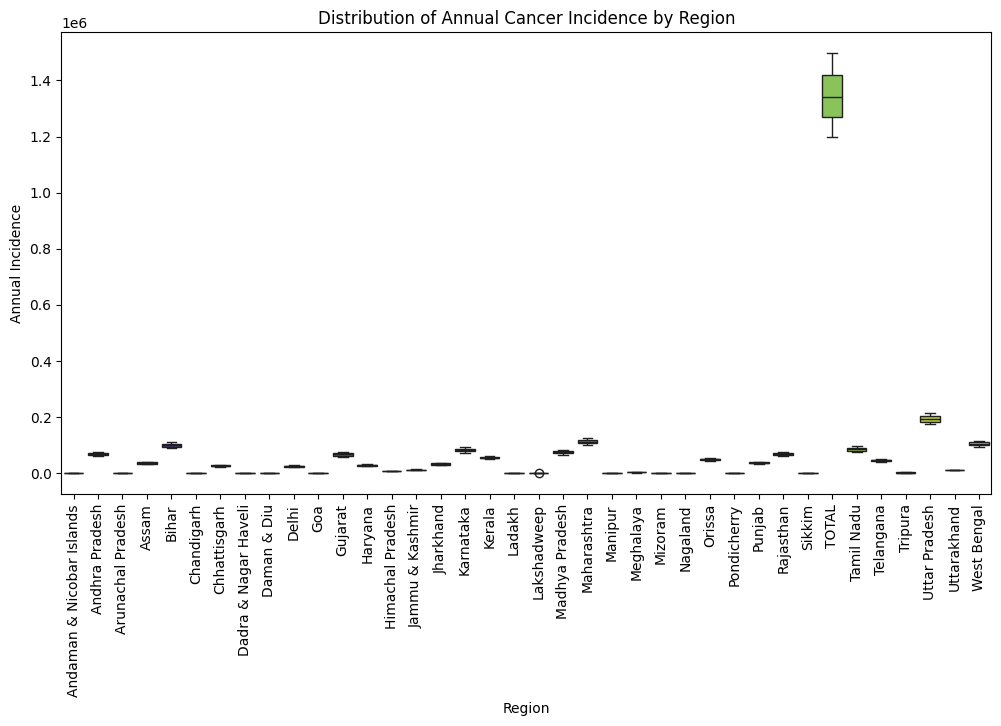

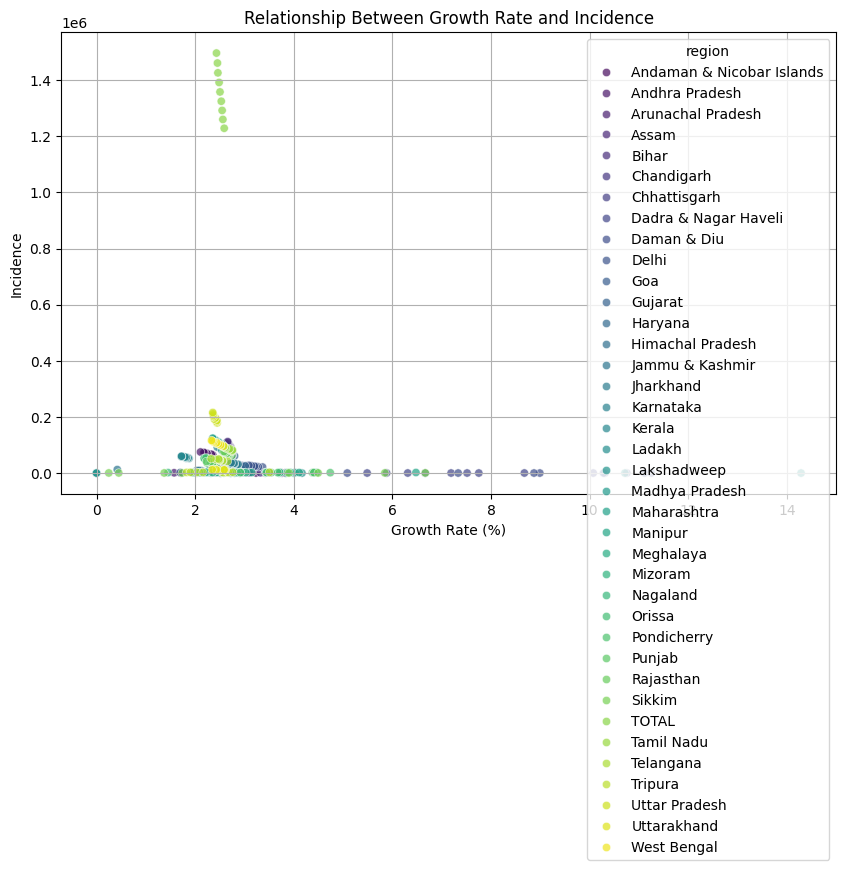

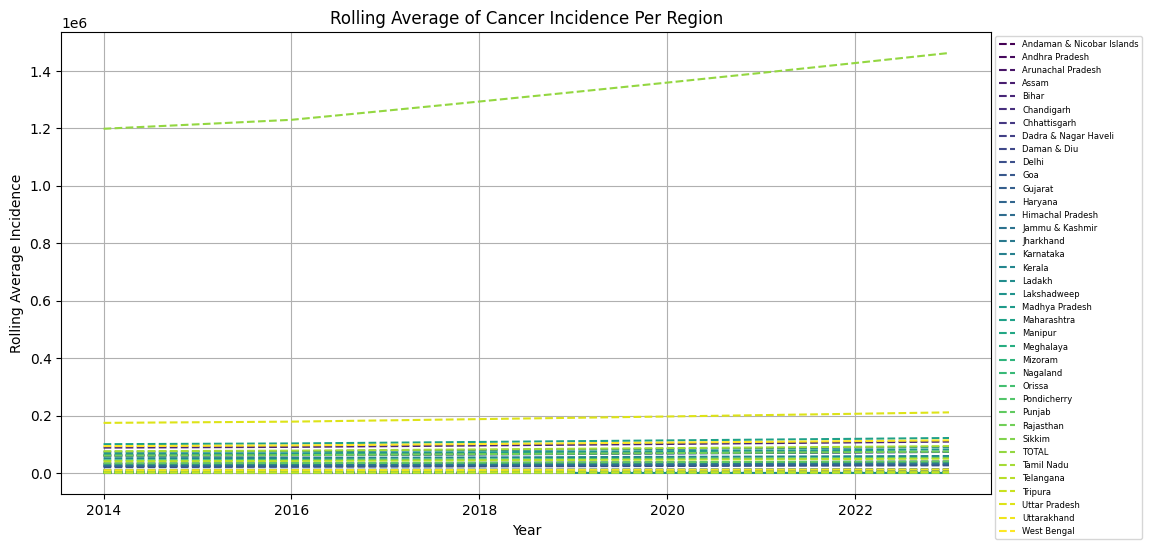

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Load the dataset
file_path = "Transformed_Cancer_Incidence.csv"
df = pd.read_csv(file_path)

# Ensure data is sorted by year
df = df.sort_values(by=["region", "Year"])

# Unique regions
regions = df["region"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(regions)))

# Figure 1: Cumulative Incidence over Time by Region
plt.figure(figsize=(12, 6))
for region, color in zip(regions, colors):
    region_data = df[df["region"] == region]
    plt.fill_between(region_data["Year"], region_data["Cumulative_Incidence"], alpha=0.5, color=color, label=region)
    plt.text(region_data["Year"].max(), region_data["Cumulative_Incidence"].max(), f"{region_data['Cumulative_Incidence'].max():,.0f}", ha='left', fontsize=8, color=color)
plt.title("Cumulative Cancer Incidence Over Time by Region")
plt.xlabel("Year")
plt.ylabel("Cumulative Incidence")
plt.legend(fontsize=6, loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

# Figure 2: Annual Incidence per Region (Line Plot)
plt.figure(figsize=(12, 6))
for region, color in zip(regions, colors):
    region_data = df[df["region"] == region]
    plt.plot(region_data["Year"], region_data["Incidence"], marker='o', linestyle='-', color=color, label=region)
plt.title("Annual Cancer Incidence Per Region")
plt.xlabel("Year")
plt.ylabel("New Cases Per Year")
plt.legend(fontsize=6, loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

# Figure 3: Heatmap of Incidence Growth Rate by Region and Year
pivot_table = df.pivot(index="region", columns="Year", values="Growth_Rate")
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".1f")
plt.title("Growth Rate of Cancer Incidence by Region and Year")
plt.xlabel("Year")
plt.ylabel("Region")
plt.show()

# Figure 4: Boxplot of Annual Incidence by Region
plt.figure(figsize=(12, 6))
sns.boxplot(x="region", y="Incidence", data=df, palette="viridis")
plt.xticks(rotation=90)
plt.title("Distribution of Annual Cancer Incidence by Region")
plt.xlabel("Region")
plt.ylabel("Annual Incidence")
plt.show()

# Figure 5: Scatter Plot of Incidence vs Growth Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Growth_Rate"], y=df["Incidence"], hue=df["region"], palette="viridis", alpha=0.7)
plt.title("Relationship Between Growth Rate and Incidence")
plt.xlabel("Growth Rate (%)")
plt.ylabel("Incidence")
plt.grid(True)
plt.show()

# Figure 6: Rolling Average Incidence per Region
plt.figure(figsize=(12, 6))
for region, color in zip(regions, colors):
    region_data = df[df["region"] == region]
    plt.plot(region_data["Year"], region_data["Rolling_Avg_Incidence"], linestyle='--', color=color, label=region)
plt.title("Rolling Average of Cancer Incidence Per Region")
plt.xlabel("Year")
plt.ylabel("Rolling Average Incidence")
plt.legend(fontsize=6, loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [1]:
import matplotlib.pyplot as plt

# Sorting regions by total cancer incidence over the years in descending order
region_totals = df.groupby('region')['Incidence'].sum().sort_values(ascending=False)
sorted_regions = region_totals.index.tolist()

# Reordering the dataframe
df['region'] = pd.Categorical(df['region'], categories=sorted_regions, ordered=True)
df = df.sort_values(['region', 'Year'])

# Plot the data
plt.figure(figsize=(14, 6))

# Plot each region separately
for region in sorted_regions:
    region_data = df[df['region'] == region]
    plt.plot(region_data['Year'], region_data['Incidence'], marker='o', label=region)

plt.xlabel('Year')
plt.ylabel('New Cases Per Year')
plt.title('Annual Cancer Incidence Per Region (Sorted by Highest Cases)')
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)

# Show the plot
plt.show()


NameError: name 'df' is not defined

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
# Load the dataset
file_path = "Transformed_Cancer_Incidence.csv"
df = pd.read_csv(file_path)

In [5]:
# Sorting regions by total cancer incidence over the years in descending order
region_totals = df.groupby('region')['Incidence'].sum().sort_values(ascending=False)
sorted_regions = region_totals.index.tolist()

In [6]:
# Reordering the dataframe
df['region'] = pd.Categorical(df['region'], categories=sorted_regions, ordered=True)
df = df.sort_values(['region', 'Year'])

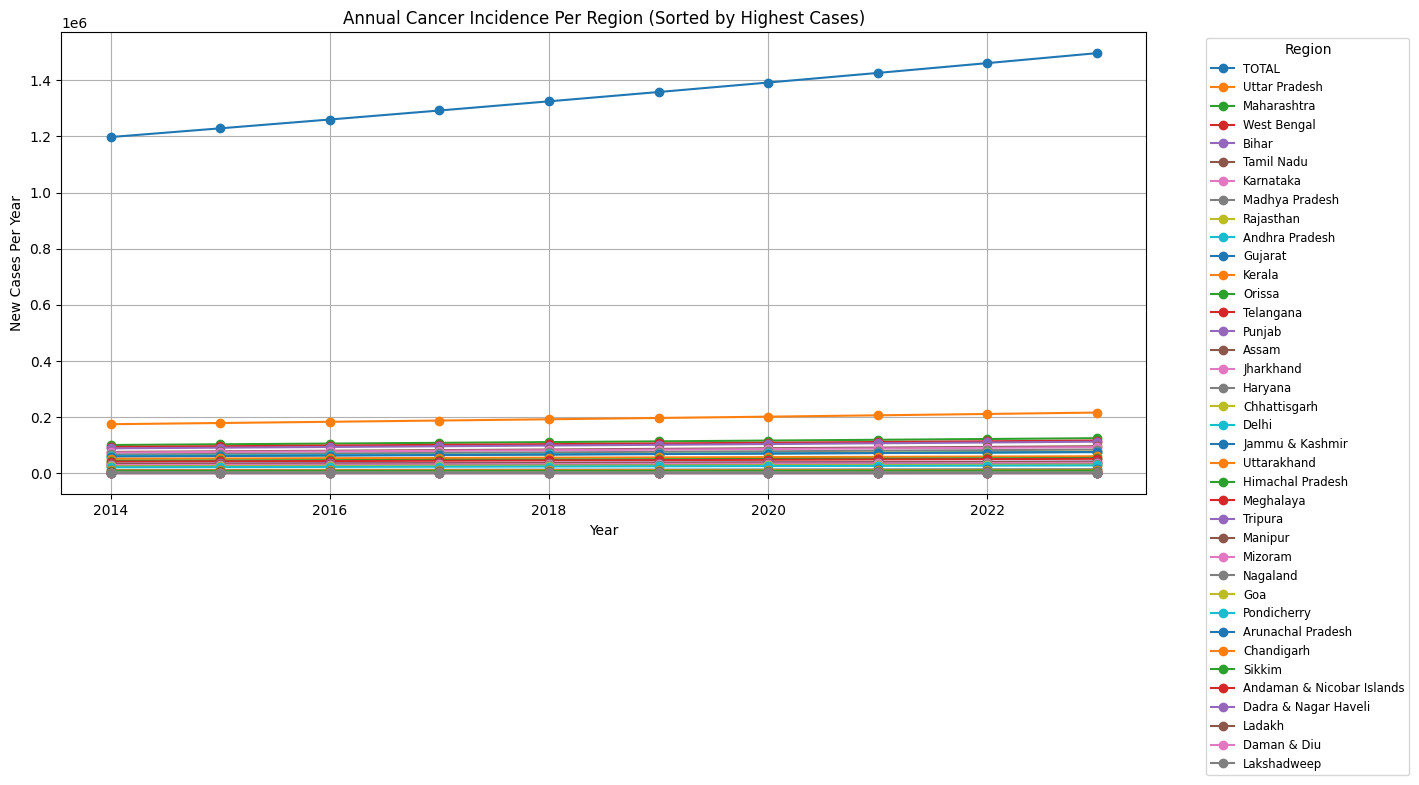

In [7]:
# Plot the data
plt.figure(figsize=(14, 6))

# Plot each region separately
for region in sorted_regions:
    region_data = df[df['region'] == region]
    plt.plot(region_data['Year'], region_data['Incidence'], marker='o', label=region)

plt.xlabel('Year')
plt.ylabel('New Cases Per Year')
plt.title('Annual Cancer Incidence Per Region (Sorted by Highest Cases)')
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)

# Show the plot
plt.show()

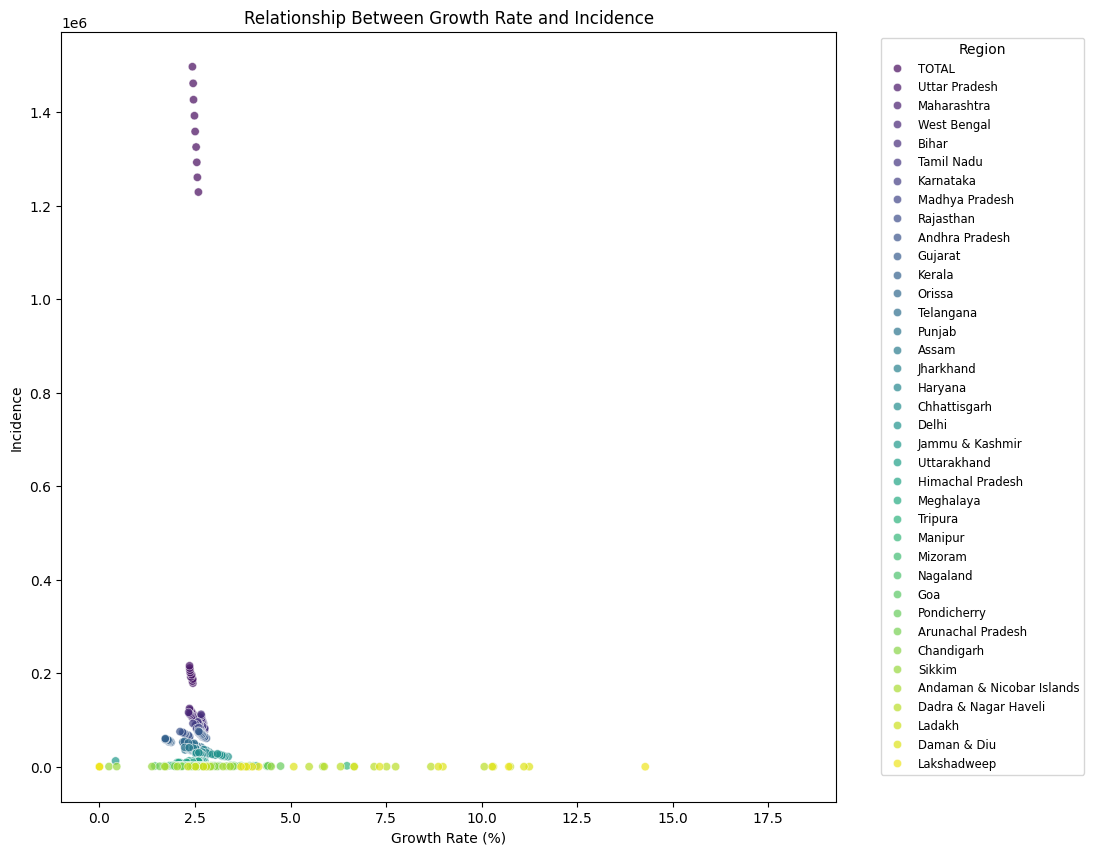

In [11]:
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x="Growth_Rate", y="Incidence", hue="region", palette="viridis", alpha=0.7)

# Adjust x-axis to shift the chart rightward
plt.xlim(left=-1, right=df["Growth_Rate"].max() + 5)

# Labels and title
plt.xlabel("Growth Rate (%)")
plt.ylabel("Incidence")
plt.title("Relationship Between Growth Rate and Incidence")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small")

# Show plot
plt.show()


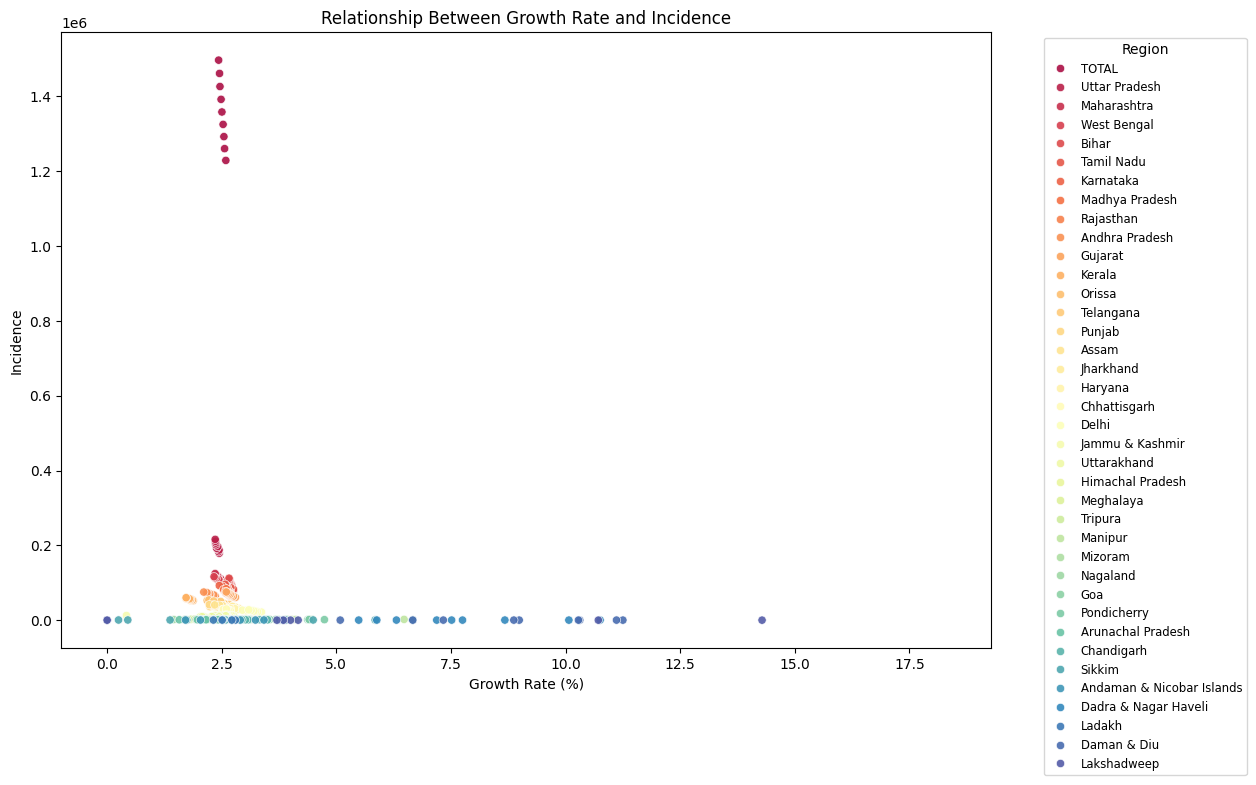

In [12]:
# Create the scatter plot with a more distinguishable high-contrast color palette
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="Growth_Rate", y="Incidence", hue="region", palette="Spectral", alpha=0.9)

# Adjust x-axis to shift the chart rightward
plt.xlim(left=-1, right=df["Growth_Rate"].max() + 5)

# Labels and title
plt.xlabel("Growth Rate (%)")
plt.ylabel("Incidence")
plt.title("Relationship Between Growth Rate and Incidence")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small")

# Show plot
plt.show()


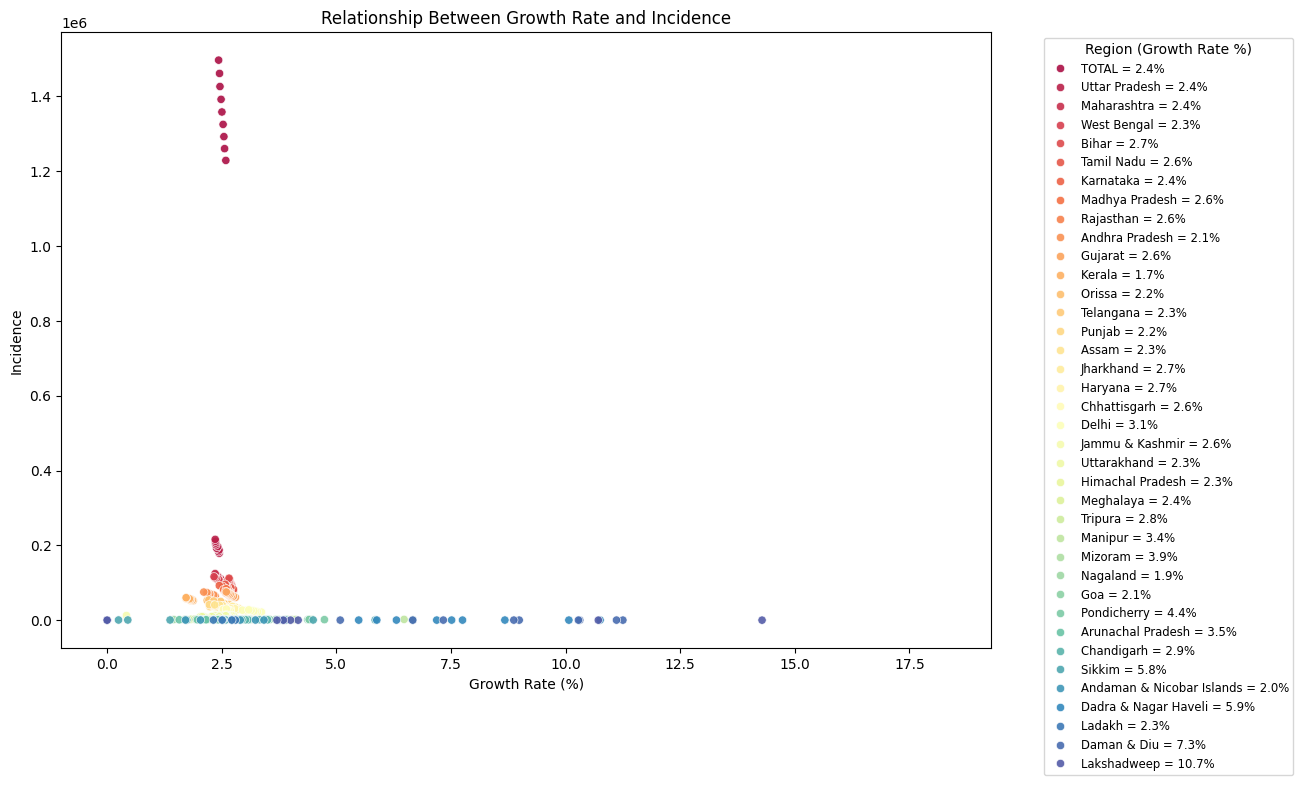

In [13]:
# Create a dictionary to map regions to their growth rates
region_growth_map = {row["region"]: f"{row['region']} = {row['Growth_Rate']:.1f}%" for _, row in df.iterrows()}

# Apply the mapping to rename legend labels
df["region_label"] = df["region"].map(region_growth_map)

# Create the scatter plot with the modified legend labels
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="Growth_Rate", y="Incidence", hue="region_label", palette="Spectral", alpha=0.9)

# Adjust x-axis to shift the chart rightward
plt.xlim(left=-1, right=df["Growth_Rate"].max() + 5)

# Labels and title
plt.xlabel("Growth Rate (%)")
plt.ylabel("Incidence")
plt.title("Relationship Between Growth Rate and Incidence")

# Adjust legend to display full text
plt.legend(title="Region (Growth Rate %)", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small")

# Show plot
plt.show()
